# Necessary Comment : jupyter notebook

## Necessary Lighbary



In [110]:
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

## Database Connection

In [111]:
connection = sqlite3.connect(r"cripto.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [112]:
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,BTCBUSD,17148.23,17151.81,17147.93,17150.20,48.51781,0.0114880661152852,1670649419999,1090.0,21.74806,1.670649e+09
1,2,BTCBUSD,17150.47,17151.20,17144.26,17145.51,71.19007,-0.0289204902256484,1670649479999,1340.0,31.63807,1.670649e+09
2,3,BTCBUSD,17145.51,17148.41,17144.04,17146.01,51.85430,0.00291621538233625,1670649539999,950.0,26.89720,1.670649e+09
3,4,BTCBUSD,17145.98,17147.18,17140.43,17143.59,84.33509,-0.0139391274222845,1670649599999,1406.0,40.72890,1.670650e+09
4,5,BTCBUSD,17143.17,17145.24,17143.01,17145.12,42.60032,0.0113747924100428,1670649659999,744.0,23.43319,1.670650e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1436,BTCBUSD,17159.60,17159.60,17157.00,17157.80,34.20832,-0.01048975500594,1670735519999,1059.0,13.81705,1.670735e+09
1436,1437,BTCBUSD,17157.89,17159.10,17157.13,17159.02,16.47668,0.00658589138874896,1670735579999,794.0,8.70431,1.670736e+09
1437,1438,BTCBUSD,17159.09,17160.09,17157.48,17158.18,15.17214,-0.00530331153924745,1670735639999,662.0,5.87516,1.670736e+09
1438,1439,BTCBUSD,17158.13,17159.34,17158.00,17158.42,11.54814,0.0016901608741584,1670735699999,710.0,4.83457,1.670736e+09


## Name Columns

In [113]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,17148.23,17151.81,17147.93,17150.20,48.51781,0.0114880661152852,1670649419999,1090.0,21.74806,1.670649e+09
1,2,BTCBUSD,17150.47,17151.20,17144.26,17145.51,71.19007,-0.0289204902256484,1670649479999,1340.0,31.63807,1.670649e+09
2,3,BTCBUSD,17145.51,17148.41,17144.04,17146.01,51.85430,0.00291621538233625,1670649539999,950.0,26.89720,1.670649e+09
3,4,BTCBUSD,17145.98,17147.18,17140.43,17143.59,84.33509,-0.0139391274222845,1670649599999,1406.0,40.72890,1.670650e+09
4,5,BTCBUSD,17143.17,17145.24,17143.01,17145.12,42.60032,0.0113747924100428,1670649659999,744.0,23.43319,1.670650e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1436,BTCBUSD,17159.60,17159.60,17157.00,17157.80,34.20832,-0.01048975500594,1670735519999,1059.0,13.81705,1.670735e+09
1436,1437,BTCBUSD,17157.89,17159.10,17157.13,17159.02,16.47668,0.00658589138874896,1670735579999,794.0,8.70431,1.670736e+09
1437,1438,BTCBUSD,17159.09,17160.09,17157.48,17158.18,15.17214,-0.00530331153924745,1670735639999,662.0,5.87516,1.670736e+09
1438,1439,BTCBUSD,17158.13,17159.34,17158.00,17158.42,11.54814,0.0016901608741584,1670735699999,710.0,4.83457,1.670736e+09


# Make a Candle plot

In [114]:
# """
# Candle Data Column
# """
# df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]

# """
# Time Indexing
# """
# df_candle = df.set_index('CloseTime')
# df_candle.index = pd.to_datetime(df.index, unit='ms')

# mpf.plot(
#     df_candle.tail(100),
# #     df,
#     mav=[7, 25 , 90],
#     type="candle",
# #     type="renko",
#     title=f"BTC BUSD Price Candle",
#     style="yahoo",
# )

In [115]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,
2022-12-10 05:16:59.999,1,BTCBUSD,17148.23,17151.81,17147.93,17150.20,48.51781,0.0114880661152852,1090.0,21.74806,1.670649e+09
2022-12-10 05:17:59.999,2,BTCBUSD,17150.47,17151.20,17144.26,17145.51,71.19007,-0.0289204902256484,1340.0,31.63807,1.670649e+09
2022-12-10 05:18:59.999,3,BTCBUSD,17145.51,17148.41,17144.04,17146.01,51.85430,0.00291621538233625,950.0,26.89720,1.670649e+09
2022-12-10 05:19:59.999,4,BTCBUSD,17145.98,17147.18,17140.43,17143.59,84.33509,-0.0139391274222845,1406.0,40.72890,1.670650e+09
2022-12-10 05:20:59.999,5,BTCBUSD,17143.17,17145.24,17143.01,17145.12,42.60032,0.0113747924100428,744.0,23.43319,1.670650e+09
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-11 05:11:59.999,1436,BTCBUSD,17159.60,17159.60,17157.00,17157.80,34.20832,-0.01048975500594,1059.0,13.81705,1.670735e+09
2022-12-11 05:12:59.999,1437,BTCBUSD,17157.89,17159.10,17157.13,17159.02,16.47668,0.00658589138874896,794.0,8.70431,1.670736e+09
2022-12-11 05:13:59.999,1438,BTCBUSD,17159.09,17160.09,17157.48,17158.18,15.17214,-0.00530331153924745,662.0,5.87516,1.670736e+09


# Make a Custom Pattern

In [116]:
# # TODO: ALL all 100 and -100 to the X asis
# # Find Candle Pattern
# ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
#                                          df['Close'])
# # ENGULFING
# ENGULFING[ENGULFING != 0]

# bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
# bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

# addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
# mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

In [117]:
# dir(talib)

In [118]:
"""
means you are dropping duplicket column.
https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

"""
df = df.head(100)
# df = df.reset_index(drop=True) 
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,
2022-12-10 05:16:59.999,1,BTCBUSD,17148.23,17151.81,17147.93,17150.20,48.51781,0.0114880661152852,1090.0,21.74806,1.670649e+09
2022-12-10 05:17:59.999,2,BTCBUSD,17150.47,17151.20,17144.26,17145.51,71.19007,-0.0289204902256484,1340.0,31.63807,1.670649e+09
2022-12-10 05:18:59.999,3,BTCBUSD,17145.51,17148.41,17144.04,17146.01,51.85430,0.00291621538233625,950.0,26.89720,1.670649e+09
2022-12-10 05:19:59.999,4,BTCBUSD,17145.98,17147.18,17140.43,17143.59,84.33509,-0.0139391274222845,1406.0,40.72890,1.670650e+09
2022-12-10 05:20:59.999,5,BTCBUSD,17143.17,17145.24,17143.01,17145.12,42.60032,0.0113747924100428,744.0,23.43319,1.670650e+09
2022-12-10 05:21:59.999,6,BTCBUSD,17145.25,17145.87,17142.96,17143.29,22.05336,-0.0114317376532808,457.0,9.29299,1.670650e+09
2022-12-10 05:22:59.999,7,BTCBUSD,17143.26,17145.20,17142.96,17144.72,27.66032,0.00851646652971935,599.0,13.11976,1.670650e+09
2022-12-10 05:23:59.999,8,BTCBUSD,17145.09,17147.29,17144.65,17146.15,37.79655,0.00618252805906128,807.0,20.38583,1.670650e+09
2022-12-10 05:24:59.999,9,BTCBUSD,17146.17,17146.67,17144.56,17145.35,23.85201,-0.00478240913276673,500.0,10.37807,1.670650e+09


# Make Dataframe From Binance Data

In [119]:
# from dataframe import GetDataframe
# df = GetDataframe().data_function('BTCBUSD', 1, 100)
# df

## Get Result and All the candlesticks from Ta-Lib

In [120]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[CloseTime
2022-12-10 05:16:59.999    0
2022-12-10 05:17:59.999    0
2022-12-10 05:18:59.999    0
2022-12-10 05:19:59.999    0
2022-12-10 05:20:59.999    0
2022-12-10 05:21:59.999    0
2022-12-10 05:22:59.999    0
2022-12-10 05:23:59.999    0
2022-12-10 05:24:59.999    0
2022-12-10 05:25:59.999    0
2022-12-10 05:26:59.999    0
2022-12-10 05:27:59.999    0
2022-12-10 05:28:59.999    0
2022-12-10 05:29:59.999    0
2022-12-10 05:30:59.999    0
2022-12-10 05:31:59.999    0
2022-12-10 05:32:59.999    0
2022-12-10 05:33:59.999    0
2022-12-10 05:34:59.999    0
2022-12-10 05:35:59.999    0
2022-12-10 05:36:59.999    0
2022-12-10 05:37:59.999    0
2022-12-10 05:38:59.999    0
2022-12-10 05:39:59.999    0
2022-12-10 05:40:59.999    0
2022-12-10 05:41:59.999    0
2022-12-10 05:42:59.999    0
2022-12-10 05:43:59.999    0
2022-12-10 05:44:59.999    0
2022-12-10 05:45:59.999    0
2022-12-10 05:46:59.999    0
2022-12-10 05:47:59.999    0
2022-12-10 05:48:59.999    0
2022-12-10 05:49:59.999    0
202

## Frame all candle and add sum of the candle result

In [121]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Sum
CloseTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-10 05:16:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 05:17:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 05:18:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 05:19:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 05:20:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 05:21:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 05:22:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 05:23:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 05:24:59.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Saferate Numeracdata from dataframe

In [122]:
df = df.drop(['Symbol', 'Id', 'Time'], axis=1)

In [123]:
# df = df.iloc[:,0:10]
# x

## Combine two Dataframe

In [126]:
df = df.astype(float)


In [127]:
df = df.add(patterns, fill_value=0)
df.head(60)

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Sum,Trades,VolumeBTC
CloseTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-10 05:16:59.999,21.74806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011488,17150.20,17151.81,17147.93,17148.23,0.0,1090.0,48.51781
2022-12-10 05:17:59.999,31.63807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.028920,17145.51,17151.20,17144.26,17150.47,0.0,1340.0,71.19007
2022-12-10 05:18:59.999,26.89720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002916,17146.01,17148.41,17144.04,17145.51,0.0,950.0,51.85430
2022-12-10 05:19:59.999,40.72890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.013939,17143.59,17147.18,17140.43,17145.98,0.0,1406.0,84.33509
2022-12-10 05:20:59.999,23.43319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011375,17145.12,17145.24,17143.01,17143.17,0.0,744.0,42.60032
2022-12-10 05:21:59.999,9.29299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.011432,17143.29,17145.87,17142.96,17145.25,0.0,457.0,22.05336
2022-12-10 05:22:59.999,13.11976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008516,17144.72,17145.20,17142.96,17143.26,0.0,599.0,27.66032
2022-12-10 05:23:59.999,20.38583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006183,17146.15,17147.29,17144.65,17145.09,0.0,807.0,37.79655
2022-12-10 05:24:59.999,10.37807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Make a plot to see the sum

CloseTime
2022-12-10 05:16:59.999       0
2022-12-10 05:17:59.999       0
2022-12-10 05:18:59.999       0
2022-12-10 05:19:59.999       0
2022-12-10 05:20:59.999       0
2022-12-10 05:21:59.999       0
2022-12-10 05:22:59.999       0
2022-12-10 05:23:59.999       0
2022-12-10 05:24:59.999       0
2022-12-10 05:25:59.999       0
2022-12-10 05:26:59.999    -200
2022-12-10 05:27:59.999     200
2022-12-10 05:28:59.999       0
2022-12-10 05:29:59.999       0
2022-12-10 05:30:59.999       0
2022-12-10 05:31:59.999     200
2022-12-10 05:32:59.999    -200
2022-12-10 05:33:59.999     200
2022-12-10 05:34:59.999       0
2022-12-10 05:35:59.999     400
2022-12-10 05:36:59.999    1000
2022-12-10 05:37:59.999    -400
2022-12-10 05:38:59.999       0
2022-12-10 05:39:59.999     600
2022-12-10 05:40:59.999    -800
2022-12-10 05:41:59.999    1000
2022-12-10 05:42:59.999     200
2022-12-10 05:43:59.999    -200
2022-12-10 05:44:59.999    -200
2022-12-10 05:45:59.999    -200
2022-12-10 05:46:59.999     40

<AxesSubplot:xlabel='CloseTime'>

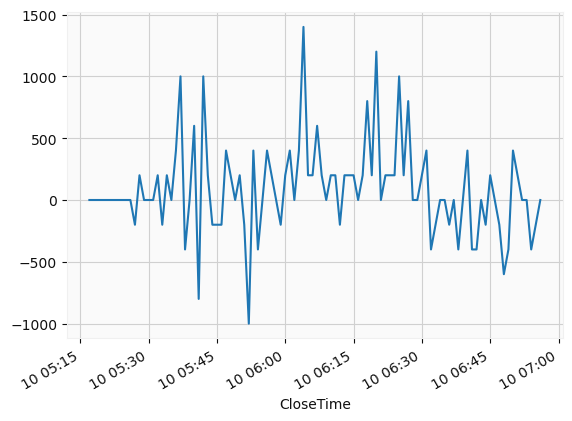

In [128]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

## X paramiter for feeding Model

In [132]:
X = df.drop(['Sum'], axis=1)
X

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Trades,VolumeBTC
CloseTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-10 05:16:59.999,21.74806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011488,17150.20,17151.81,17147.93,17148.23,1090.0,48.51781
2022-12-10 05:17:59.999,31.63807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.028920,17145.51,17151.20,17144.26,17150.47,1340.0,71.19007
2022-12-10 05:18:59.999,26.89720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002916,17146.01,17148.41,17144.04,17145.51,950.0,51.85430
2022-12-10 05:19:59.999,40.72890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.013939,17143.59,17147.18,17140.43,17145.98,1406.0,84.33509
2022-12-10 05:20:59.999,23.43319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011375,17145.12,17145.24,17143.01,17143.17,744.0,42.60032
2022-12-10 05:21:59.999,9.29299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.011432,17143.29,17145.87,17142.96,17145.25,457.0,22.05336
2022-12-10 05:22:59.999,13.11976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008516,17144.72,17145.20,17142.96,17143.26,599.0,27.66032
2022-12-10 05:23:59.999,20.38583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006183,17146.15,17147.29,17144.65,17145.09,807.0,37.79655
2022-12-10 05:24:59.999,10.37807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Y paramiter for feedind Model

In [133]:
y = df['Sum']
y

CloseTime
2022-12-10 05:16:59.999      0.0
2022-12-10 05:17:59.999      0.0
2022-12-10 05:18:59.999      0.0
2022-12-10 05:19:59.999      0.0
2022-12-10 05:20:59.999      0.0
2022-12-10 05:21:59.999      0.0
2022-12-10 05:22:59.999      0.0
2022-12-10 05:23:59.999      0.0
2022-12-10 05:24:59.999      0.0
2022-12-10 05:25:59.999      0.0
2022-12-10 05:26:59.999   -100.0
2022-12-10 05:27:59.999    100.0
2022-12-10 05:28:59.999      0.0
2022-12-10 05:29:59.999      0.0
2022-12-10 05:30:59.999      0.0
2022-12-10 05:31:59.999    100.0
2022-12-10 05:32:59.999   -100.0
2022-12-10 05:33:59.999    100.0
2022-12-10 05:34:59.999      0.0
2022-12-10 05:35:59.999    200.0
2022-12-10 05:36:59.999    500.0
2022-12-10 05:37:59.999   -200.0
2022-12-10 05:38:59.999      0.0
2022-12-10 05:39:59.999    300.0
2022-12-10 05:40:59.999   -400.0
2022-12-10 05:41:59.999    500.0
2022-12-10 05:42:59.999    100.0
2022-12-10 05:43:59.999   -100.0
2022-12-10 05:44:59.999   -100.0
2022-12-10 05:45:59.999   -100.0


## Model for AI Research

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
#model=RandomForestClassifier()
model

DecisionTreeClassifier()

## Fit X and y data to model

In [137]:
model.fit(X, y)

DecisionTreeClassifier()

## Directally Grab Fidable data from internet but it have to be superviged test data from database

In [139]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['Sum'], axis=1)
df = df.iloc[0]
# print(df)
print(model.predict([df]))

/Users/forhad/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 71 features, but DecisionTreeClassifier is expecting 69 features as input.

## Calculating the Accuracy
### Normally I take very small data for that but in real application we have to take very big dataset

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.8)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.2375

## Export Train model

In [22]:
import joblib
joblib.dump(model, "btcbusd_trand_predictor.joblib")

['btcbusd_trand_predictor.joblib']

## Make Prediction With Train Model

In [23]:
# print(df)

model = joblib.load("btcbusd_trand_predictor.joblib")
predictions = model.predict([df])
predictions

/Users/forhad/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([-100.])

## All Coulms need for creat a Visual Representation

In [24]:
feature_name = list(X.columns)

## Export model in dot visual language
class_names=sorted(y.unique()),

In [25]:
from sklearn import tree
model = DecisionTreeClassifier()
model.fit(X, y)
tree.export_graphviz(model, out_file='btc_busd_visual.dot',
                    feature_names=feature_name,
                     label='all',
                     rounded=True,
                     filled=True     
                    )